# Computer Project for TMA4215

$$
\DeclareMathOperator{\Div}{div}
\DeclareMathOperator{\Grad}{grad}
\DeclareMathOperator{\Curl}{curl}
\DeclareMathOperator{\Rot}{rot}
\DeclareMathOperator{\ord}{ord}
\DeclareMathOperator{\Kern}{ker}
\DeclareMathOperator{\Image}{im}
\DeclareMathOperator{\spann}{span}
\DeclareMathOperator{\rank}{rank}
\DeclareMathOperator{\dist}{dist}
\DeclareMathOperator{\diam}{diam}
\DeclareMathOperator{\sig}{sig}
\DeclareMathOperator{\Id}{Id}
\DeclareMathOperator{\CQR}{CQR}
\DeclareMathOperator{\QR}{QR}
\DeclareMathOperator{\TR}{TR}
\DeclareMathOperator{\CTR}{CTR}
\DeclareMathOperator{\SR}{SR}
\DeclareMathOperator{\CSR}{CSR}
\DeclareMathOperator{\NCR}{NCR}
\DeclareMathOperator{\MR}{MR}
\newcommand{\RR}{\mathbb{R}}
\newcommand{\NN}{\mathbb{N}}
\newcommand{\VV}{\mathbb{V}}
\newcommand{\PP}{\mathbb{P}}
\newcommand{\dGamma}{\,\mathrm{d} \Gamma}
\newcommand{\dGammah}{\,\mathrm{d} \Gamma_h}
\newcommand{\dx}{\,\mathrm{d}x}
\newcommand{\dy}{\,\mathrm{d}y}
\newcommand{\ds}{\,\mathrm{d}s}
\newcommand{\dt}{\,\mathrm{d}t}
\newcommand{\dS}{\,\mathrm{d}S}
\newcommand{\dV}{\,\mathrm{d}V}
\newcommand{\dX}{\,\mathrm{d}X}
\newcommand{\dY}{\,\mathrm{d}Y}
\newcommand{\dE}{\,\mathrm{d}E}
\newcommand{\dK}{\,\mathrm{d}K}
\newcommand{\dM}{\,\mathrm{d}M}
\newcommand{\cd}{\mathrm{cd}}
\newcommand{\onehalf}{\frac{1}{2}}
\newcommand{\bfP}{\boldsymbol P}
\newcommand{\bfx}{\boldsymbol x}
\newcommand{\bfy}{\boldsymbol y}
\newcommand{\bfa}{\boldsymbol a}
\newcommand{\bfu}{\boldsymbol u}
\newcommand{\bfv}{\boldsymbol v}
\newcommand{\bfe}{\boldsymbol e}
\newcommand{\bfb}{\boldsymbol b}
\newcommand{\bfc}{\boldsymbol c}
\newcommand{\bfq}{\boldsymbol q}
\newcommand{\bfy}{\boldsymbol y}
\newcommand{\bff}{\boldsymbol f}
\newcommand{\bfp}{\boldsymbol p}
\newcommand{\bft}{\boldsymbol t}
\newcommand{\bfj}{\boldsymbol j}
\newcommand{\bfB}{\boldsymbol B}
\newcommand{\bfV}{\boldsymbol V}
\newcommand{\bfE}{\boldsymbol E}
\newcommand{\bfB}{\boldsymbol B}
\newcommand{\bfzero}{\boldsymbol 0}
$$

In [2]:
from IPython.core.display import HTML
def css_styling():
    styles = open("D:\sjurs\Skole\TMA4215 Nummat\styles\TMA4215.css", "r").read()
    return HTML(styles)

# Comment out next line and execute this cell to restore the default notebook style 
#css_styling()

## Part 2: The Heat Equation

After the crash course on finite difference methods in the first part we now return
to more known waters, namely numerical methods for ODE. The main goal
of this part  to develop a solver for the __classical heat equation__
\begin{alignat*}{3}
\partial_t u - \kappa \Delta u &= f
&& \quad \text{in } \Omega  \times (t_0, T)
\subset \RR^2 \times \RR,
\\
u &= u_D && \quad  \text{on } \partial \Omega  \times (t_0, T)
\subset \RR^2 \times \RR
\\
u(\cdot,t_0) &= u_0
&&\quad \text{in } \Omega.
\end{alignat*}
and this will be accomplished by
transforming the heat equation into an (large) ODE system
with the help of the finite difference method.

### Chapter 1: The Crank-Nicolson and $\theta$-Method for ODEs

We start from SMIA Lecture 22 on Runge-Kutta methods (have a look at the Jupyter notebook for concepts and notation).

#### Task 1: Derivation of the Crank-Nicolsen method

We recall the initial value problem for ordinary differential equations:

Given function $f: [0,T] \times \RR^n \to \RR^n$ and initial value
$y_0 \in \RR$, find $y: [0,T] \to \RR^n$ such that
\begin{align}
y'(t) &= f(t,y(t)) \quad t \in (0,T),
\tag{1a}
\\
y(0) &= y_0.
\tag{1b}
\end{align}

Recall the integral representation of (1a)-(1b) considered in Lecture 21 and 22
and apply the trapezoidal rule to the integral. 

__a__) How does the resulting one-step method look like?

<font color="blue"> Solution: </font>

$$ y'(t) = f(t,y(t)), \quad t \in (0,T)$$ $$\Rightarrow y(t_{i+1})-y(t_i)=\int ^{t_{i+1}}_{t_i}f(\tau,y(\tau))d\tau, \quad i = 0,1,...,n-1,n, \quad t_n = T $$

Applying the trapezoid rule: $\int ^{t_{i+1}}_{t_i}f(\tau,y(\tau))d\tau \approx \frac{h}{2}\left(f(t_i,y(t_i))+f(t_{i+1},y(t_{i+1}))\right), \quad h = t_{i+1}-t_i.$

Hence, $y_{i+1} \approx y_i + \frac{h}{2}\left(f(t_i,y(t_i))+f(t_{i+1},y(t_{i+1}))\right).$

It is apparent that the trapezoidal rule is an implicit one-step method.

As a side note: Heun's method is also called the explicit trapezoid method. It is explicit and one-step. This method calculates an estimate for the implicit $y_{i+1}$ using Euler's method:
$$\tilde{y}_{i+1}= y_i + h f(t_n,y_n),$$
before this is used in the final formula: $y_{i+1} \approx y_i + \frac{h}{2}\left(f(t_i,y_i)+f(t_{i+1},\tilde{y}_{i+1})\right).$

__b__) Is this a Runge-Kutta method? Write down the Butcher table. 

<font color="blue"> Solution: </font>

It is readily apparent that the trapezoid rule is a Runge-Kutta method (the explicit trapezoid method too, for that sake), as the calculation $n$-th point of $y$ can be expressed as

$$ y_{n+1} = y_n + \frac{h}{2}\left(f(t_n,y_n)+f(t_{n+1},y_{n+1}))\right) = 
y_n + h\sum_{i=1}^2 b_ik_i,$$
where $b_1=b_2=\frac{1}{2},\quad k_1 = f(t_n,y_n),\quad k_2=f(t_{n+1},y_{n+1})=f\left(t_n+h,y_n + h\sum^2_{j=1}\frac{k_j}{2}\right).$


The resulting Butcher table/tableau is given by
$
\renewcommand\arraystretch{1.2}
\begin{array}
{c|ccc}
0 & 0 & 0
\\
1 & 1/2 & 1/2
\\
\hline
& 1/2 & 1/2
\end{array}
$.

#### Task 2: The the $\theta$-method

For $\theta \in [0,1]$ define the one-step theta method by

$$
y_{i+1} = y_i + h\left(\theta f(t_{i+1}, y_{i+1}) + (1-\theta)  f(t_{i}, y_{i})\right),
$$
so for a given $\theta$, a weighted sum/convex combination 
of $(t_{i+1}, y_{i+1})$ and $f(t_{i}, y_{i})$ is taken.

__a__) Write down the Butcher table.

<font color="blue"> Solution: </font>
$
\renewcommand\arraystretch{1.2}
\begin{array}
{c|ccc}
0 & 0 & 0
\\
1 & 1-\theta & \theta
\\
\hline
& 1-\theta & \theta
\end{array}
$.

__b__) Which known schemes to you get for $\theta=0,1,0.5$?

<font color="blue"> Solution: </font>
1. $\theta=0:\quad $
$\renewcommand\arraystretch{1.2}
\begin{array}
{c|ccc}
0 & 0 & 0
\\
1 & 1 & 0
\\
\hline
& 1 & 0
\end{array}
 \qquad \Rightarrow y_{i+1} = y_i + hf(t_i,y_i);$ Euler's method.

2. $\theta=1:\quad $
$\renewcommand\arraystretch{1.2}
\begin{array}
{c|ccc}
0 & 0 & 0
\\
1 & 0 & 1
\\
\hline
& 0 & 1
\end{array}
\qquad \Rightarrow y_{i+1} = y_i + hf(t_i+h,y_{i+1});$ Backwards Euler.
3. $\theta=0.5 \qquad \Rightarrow y_{i+1} = y_i + \frac{h}{2}(f(t_i,y_i)+f(t_i+h,y_{i+1}));$ Trapezoid rule.

__c__) Use the __order conditions__ to determine the consistency order of the   $\theta$-method. (Your answer will depend on the choice of $\theta$. 
(Order condition will be discussed in the Lectures notes for cancelled Lecture 23).

<font color="blue"> Solution: </font>

The following are order conditions for $p=1,2,3:$
1. $p=1: \qquad \sum_i b_i = 1$
2. $p=2: \qquad \sum_i b_ic_i = 1/2$
3. $p=3: \qquad \sum_i b_ic_i^2 = 1/3, \qquad \sum_i b_ia_{ij}c_j = 1/6$


For $\theta=0$(Explicit Euler):
1. $$\sum_i b_i = 1 + 0 = 1 \qquad p\geq1,$$
2. $$\sum_i b_ic_i = 0 + 0 \neq 1/2 \qquad p = 1.$$

For $\theta=1$(Implicit Euler):
1. $$\sum_i b_i = 0 + 1 = 1 \qquad p\geq1,$$
2. $$\sum_i b_ic_i = 0 + 1 \neq 1/2 \qquad p = 1.$$

For $\theta=0.5$(Trapezoid rule):
1. $$\sum_i b_i = 1/2 + 1/2 \qquad p\geq1,$$
2. $$\sum_i b_ic_i = 0 + 1/2 = 1/2 \qquad p\geq2,$$
3. $$\sum_i b_ic_i^2 = 0 + 1/2 \neq 1/3 \qquad p=2.$$

__d__) Determine the stability function for $\theta$-method. (Will be the topic
in the Lecture on Wednesday, 13th of Nov.) 

<font color="blue"> Solution: </font>

The stability function is derived from following IVP (also given in task 3):
$\quad y' = \mu y, \quad y(0)= y_0, \quad \mu\in\mathbb{C}.$

This leads to the expression $f(t,y)=\mu y$
$$ \Rightarrow y_{n+1} = y_n + h\left(\theta f(t_{n+1}, y_{n+1}) + (1-\theta)  f(t_{n}, y_{n})\right)= y_n + h\mu\left(\theta y_{n+1} + (1-\theta)y_n\right).$$

Defining $z:=\mu h$ yields the following function:
$$y_{n+1}=\frac{1+h\mu (1-\theta)}{1-h\mu\theta}y_n = \frac{1+z (1-\theta)}{1-z\theta}y_n = R(z)y_n, $$
where $R(z)$ is the stability function for the $\theta$-method. 

The function is stable when $|y_{n+1}|=|R(z)y_n|\leq |y_n|$, meaning that the stability domain $D_{\theta}$ is given by
$$D_{\theta} = \left\{ z \in \mathbb{C}: |R(z)|= \left|\frac{1+z (1-\theta)}{1-z\theta}\right|\leq 1\right\}.$$

For Euler's method, this becomes $D_{0} = \left\{ z \in \mathbb{C}: |R(z)|= \left|1+z\right|\leq 1\right\}.$

For Backwards Euler, this becomes $D_{1} = \left\{ z \in \mathbb{C}: |R(z)|= \left|\frac{1}{1-z}\right|\leq 1\right\}.$

For The trapezoid method, this becomes 
$$D_{1/2} = \left\{ z \in \mathbb{C}: |R(z)|= \left|\frac{1+z/2}{1-z/2}\right|= \left|\frac{2+z}{2-z}\right|\leq 1\right\}.$$

#### Task 3

Implement the $\theta$ method and compute the numerical solution to simple initial value 
problem
$$
y' = \mu y 
\\
y(0) = y_0.
$$

__a__) Implement the general $\theta$-method and validate your implementation
by computing the numerical solution for
initial vale problem on the interval $(0,1)$ for $y_0=1$, $\mu = 1$, including a 
convergence/EOC test as we did before.

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
#from ipynb.fs.full.Part_1b import fdm_poisson_2d_matrix_dense
#Theta- function for the given problem
def theta_method(y0, mu, n, t0=0,T=1,theta=0.5):
    ys = [y0]
    ts = [t0]
    h = (T-t0)/n
    R = lambda y,theta,z: (1 + z*(1 - theta)) / (1 - z*theta) * y #Implementing R function from above, z = mu*h
    for i in range(1,n+1): 
        ys.append(R(ys[-1],theta,mu*h))
        ts.append(t0 + i*h)
    return np.array(ts),np.array(ys)

y = lambda t,y0,mu: y0*np.exp(mu*t) #exact solution
d = lambda x1,x2: np.abs(x1-x2).max() #error function /distance between arrays

t0,T,y0,mu = 0,1,1,1 #initial conditions
thetas = np.linspace(0,1,3)

<IPython.core.display.Javascript object>


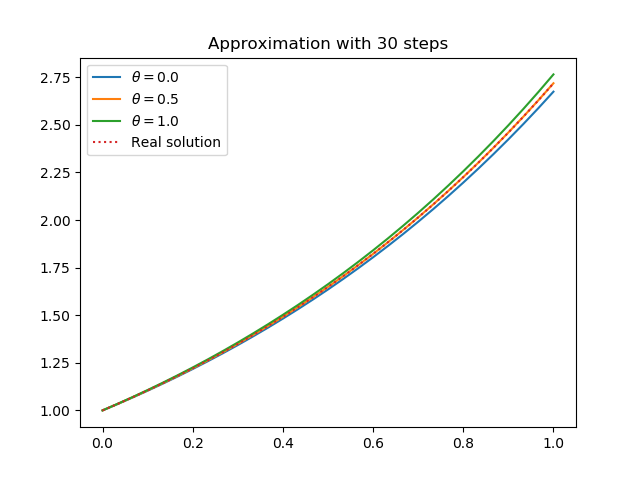

For N1-N2=30-40
Theta = 0.0,	 EOC = 0.974193373141 	OC = 1
Theta = 0.5,	 EOC = 2.00032393386 	OC = 2
Theta = 1.0,	 EOC = 1.02734517894 	OC = 1


In [2]:
N1 = 30
N2 = N1+10
err1 = []
err2 = []
plt.figure()
plt.title("Approximation with "+str(N1)+" steps")
for theta in thetas:
    ts,ys = theta_method(y0,mu,N1,theta=theta)
    plt.plot(ts,ys,label=r"$\theta = $"+str(theta))
    err1.append(d(y(ts,y0,mu),ys))
    ts,ys = theta_method(y0,mu,N2,theta=theta)
    err2.append(d(y(ts, y0, mu), ys))
plt.plot(ts,y(ts,y0,mu),label="Real solution",linestyle=":")
plt.legend()
plt.show()
oc = [1,2,1]
eoc = []
for i in range(len(err1)):
    numer = np.log10(err1[i]) - np.log10(err2[i])
    denom = np.log10(1/N1) - np.log10(1/N2)
    eoc.append(np.abs(numer/denom))

print("For N1-N2="+str(N1)+"-"+str(N2))
for i in range(3): print ("Theta = "+str(thetas[i])+",\t EOC =",eoc[i],"\tOC =",oc[i])

As can be seen from the plot and EOCs above, the method works quite well for all the $\theta$s.

__b)__ Now for $\mu \in \{-10, -100, -1000\}$ define the reference step length
$\tau_{\mu} = \dfrac{2}{|\mu|}$, plot the exact solutions and compute and plot
the numerical solution for $\tau \in \{ 5\tau_{\mu}, \tau_{\mu}, 1/5\tau_{\mu} \}$
and $\theta \in \{0, 0.5, 1\}$ What do you oberserve and why?

<font color="blue"> Solution: </font>

In [2]:
tau_mu = lambda mu: 2/np.abs(mu)

mus    = np.array([-10., -100., -1000.])
tau = np.array([5*tau_mu(mus),tau_mu(mus),tau_mu(mus)/5])
ns = (1/tau).astype('int64')
zs = mus*tau
I = lambda j,i,n: n*i + (j+1) #konverterer til 1-indeksering

#9 plott med 3 thetaer i samme plott for alle de ulike kombinasjonene.

<IPython.core.display.Javascript object>


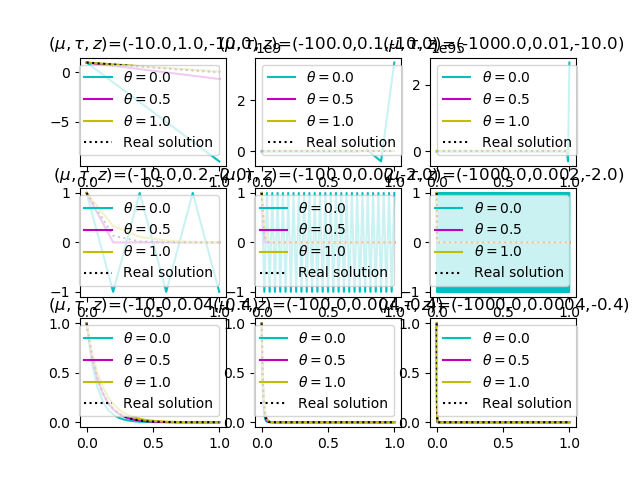

In [3]:
cmyk = ['c','m','y','k']

plt.figure()
for i in range(3): #denotes which tau is used
    for j in range(3): #denotes which mu or n is used
        plt.subplot(3,3,I(i,j,3))
        plt.title(r"$(\mu,\tau,z)$=("+str(mus[i])+','+str(tau[j,i])+','+str(zs[j,i])+')')
        for k in range(3):
            ts,ys = theta_method(y0,mus[i],ns[j,i],theta=thetas[k])
            plt.plot(ts,ys,label=r"$\theta = $"+str(thetas[k]),color=cmyk[k])
        plt.plot(ts,y(ts,y0,mus[i]),label="Real solution",linestyle=":",color='k')
        plt.legend()
plt.show()

As can be seen from the 9 plots above, the Explicit Euler method ($\theta=0$) diverges in the first three plots (where $z = \mu\tau = 10$), whilst oscillating quickly around the exact solution in the next three ($z=2$). This perfectly reflects its stability function:

$z=-10\quad\Rightarrow R(-10)=9>1\quad\Rightarrow$ instability,

$z=-2\quad\Rightarrow R(-2)=|1-2|=1,$ thus never converging nor diverging.

The other methods are stable for all $z$s, which is reflected in their stability functions. <font color="red"> (for all z in the computation above?)

Backward Euler is unstable in the region $z\in\mathbb{C}: |z-1|<1$.
And the trapezoidal rule is unstable in the region $z\in\mathbb{C}^+: Re(z)>0 $.

Both these methods are A-stable (and the backward Euler is also L-stable, L-stable methods are in general good at integrating stiff equations)
</font>

### Chapter 2: The $\theta$-method for the heat equation

\Now you are asked to combine the $\theta$ scheme the finite difference method 
as space discretization to solve the heat equation

\begin{alignat*}{3}
\partial_t u  - \Delta u  &= f  \quad && \text{in } \Omega \times (0,T]
\\
u &= g_D \quad && \text{on } \partial \Omega \times (0, T]
\\
u(x,0) &=  u_0(x) \quad && \text{in } \Omega
\end{alignat*}
 
with initial value $u_0$ and bounday value $g_D$. As before $\Omega = [0,1]^2$.
We proceed as follows.

As in Chapter 2 of part 1 a grid of $N = (n+1)^2$ grid points
$$
\{(x_j,y_j)\}_{i,j=0}^n = \{(ih,jh) \in [0,1]^2: 0\leqslant i,j \leqslant n \}
$$ are defined with the grid size $h = 1/n$.

Now we discretize in space first, starting from the idea that
\begin{align}
f(x,y,t) &= \partial_t u(x,y,t)  - \Delta u(x,y,t)
\nonumber
\\
&\approx \partial_t u(x,y,t)- (\partial_x^+ \partial_x^- +  \partial_y^+ \partial_y^- )u(x,y,t)
\nonumber
\end{align}

Since we have a partial differential equation which depends on time,
the idea is to associate with each grid point $(x_i,y_j)$ a 
__time-dependent__ unknown $U_{i,j}(t)$. Then using the finite difference method 
in space to discretize the Poisson operator $-\Delta$ we end up with the following
__system of ordinary differential equations__:

Find $U(t) = \{U_{i,j}\}_{i,j=0}^n \in \RR^{(n+1)^2} = \RR^N$ such that
\begin{align}
&\dfrac{d}{dt}U_{i,j}(t) 
-(\partial_x^+ \partial_x^- + \partial_y^+\partial_y^-) U_{ij}(t)
\nonumber
\\
=
&\dfrac{d}{dt}U_{i,j}(t) + \dfrac{4 U_{i,j}(t) - U_{i+1,j}(t) - U_{i,j+1}(t) - U_{i-1, j}(t) -  U_{i, j-1}(t)}{h^2}
\nonumber
\\
= & f(x_i, y_j,t) =: F_{ij}(t) \quad \text{for } i,j = 1,\ldots n-1,
\tag{2a}
\\
U_{i,j}(0) &= u_0(x_i, y_j) \quad \text{for } i,j = 0,\ldots n,
\tag{2b}
\end{align}
together with the boundary conditions
\begin{gather}
U_{i,j}(t) = g_D(x_i, y_j, t) \quad \text{for } (i,j) \in \{0,\ldots, n\} \times \{0,n\}
\cup \{0,n\}  \times \{0,\ldots, n\}.
\tag{2c}
\end{gather}

This is often also called a __semi-discretization (in space)__ of the heat equation (since we only discretized the equation in space but not yet in time).

Next, we subdivide $(0,T)$ into $m$ subintervals defined by the points
$\{t_k\}_{k=0}^m$ with $t_k = \tfrac{k T}{m}$,
and apply the $\theta$ method to the ODE system (2a).
We write $U_{i,j}^k$ for the approximation of $U_{i,j}(t_k)$,
$F_{i,j}^k = F_{i,j}(t_k)$,
and introduce $\overline{\theta} = 1 - \theta$.
Then after reordering terms we need to solve
\begin{align}
&\phantom{=} U_{i,j}^{k+1} 
+\tau \theta \dfrac{4 U_{i,j}^{k+1} - U_{i+1,j}^{k+1} - U_{i,j+1}^{k+1} - U_{i-1, j}^{k+1} -  U_{i, j-1}^{k+1}}{h^2}
\nonumber
\\
&= U_{i,j}^{k} -\tau \overline{\theta} \dfrac{4 U_{i,j}^{k} - U_{i+1,j}^{k} - U_{i,j+1}^{k} - U_{i-1, j}^{k} -  U_{i, j-1}^{k}}{h^2}   + \tau \theta F_{ij}^{k+1} + \tau \overline{\theta} F_{ij}^{k}
\quad \text{for } i,j = 1,\ldots n-1,
\tag{3a}
\\
U_{i,j}(0) &= u_0(x_i, y_j) \quad \text{for } i,j = 0,\ldots n,
\tag{3b}
\end{align}
together with the boundary conditions
\begin{align}
U_{i,j}^{k+1} = g_D(x_i, y_j, t_{k+1}) \quad 
&\text{for } (i,j) \in \{0,\ldots, n\} \times \{0,n\}
\cup \{0,n\}  \times \{0,\ldots, n\}
\nonumber
\\
&\text{for } k = 1, \ldots, m.
\tag{3c}
\end{align}


Finally, we need to translate (3a)-(3c) into a linear  system.
We introduce again as for the 2D Poisson problem an index mapping $\NN^2 \ni (i,j) \mapsto I(i,j) \in \NN$ to translate the double index into a single index $I = I(i,j) \in \RR^N$, $N=(n+1)^2$. Then applying the $\theta$ scheme to (2a) results in the
following method:

* Set $U^0 = \{U^0_{I}\}_{I=0}^{N-1} \in \RR^N$ with $U^0_{I(i,j)} = u_0(x_i, y_j)$ 
 for $i,j = 0,\ldots n$.
* For $k=0,\ldots, m-1$, compute $U^{k+1} \in \RR^N$ by solving the
linear system
 \begin{align}
 (\Id + \tau \theta A)U^{k+1}
= B^{k+1}
\tag{4}
\end{align}

Note this is only the case if $\theta > 0$, for $\theta = 0$, we have an explicit solver.
Here $\Id$ is the $N \times N$ identity matrix, and $A$ is the $N\times N$ matrix
resulting from the finite difference operator after index-remapping, and
with $A_{I,I} = 0$ for those index $I$ which correspond to a boundary index tuple
$(i,j)$. So $A$ is in principal the same matrix you implemented
in Part 1, Chapter 2, Task 3 but __without__ the extra modifications to set
boundary conditions.

The right-hand side $B^{k+1} \in \RR^{N}$ is computed as follows. First you compute
$$
B^{k+1} := (\Id - \tau \overline{\theta} A)U^{k}
+ \tau \theta F^{k+1} + \tau \overline{\theta} F^{k}.
$$
To incorporate the boundary conditions, you now modify $B^{k+1}$
for those index $I$ which correspond to a boundary index tuple 
$(i,j)$ by setting
$$
B^{k+1}_{I(i,j)} = g_D(x_i, y_j, t_{k+1}) \quad 
\text{for } (i,j) \in \{0,\ldots, n\} \times \{0,n\}
\cup \{0,n\}  \times \{0,\ldots, n\}.
$$
Since $A_{I,I}= 0$ for those indices, we see that then
$$
 ((\Id + \tau \theta A)U^{k+1})_{I} = U^{k+1}_{I} = B^{k+1}_{I} = g_D(x_i, y_j, t_{k+1})
$$
so $U^{k+1}$ satisfy our boundary condition at the boundary grid points at $t_{k+1}$.

#### Task 4

Implement the resuling solver to solve the heat equation. Reuse as much code
as possible from Part 1, Chapter 2 on the 2D Poisson problem, in particular
the generation of the finite difference matrix and the implementation of 
boundary conditions.

For code validation, use analytical reference function of the form
$$
u(x,y,t) = \sin(k x) \sin(l y)\exp(-\mu t)
$$
on $\Omega = [0,2\pi]^2$ and $t_0 = 0$ and $T = 1$.
for some integers $k, l$ and a constant $\mu$.

__a__) Find $\mu = \mu(k,l)$ so that u(x,y,t) is a solution of the
heat equation with $f = 0$.

<font color="blue"> Solution: </font>
For the given analytical reference solution with $f = 0$ we get
$$
\begin{align}
-\mu u(x,y,t) + (k^2+l^2)u(x,y,t) &= 0\\
\mu(k,l) &= k^2+l^2
\end{align}
$$


__b__) For $\theta \in \{0, 0.5, 1\}$ compute the numerical solution with initial data and boundary data corresponding to the function you determined in __a__)
on a number of grids with $n = \{10, 20, 40, 80\}$ corresponding to grid sizes $h = \{2\pi/10, 2\pi/20, 2\pi/40, 2\pi/80\}$.

For each of the $h$, choose the corresponding time step $\tau = h/(2\pi)$
to run your simulation and create an animation (see coding hints below)
for

* the exact solution;
* the numerical solution;
* the error function defined by $E_{i,j}^k = U^k_{i,j} - u(x_i, y_i, t_k)$.

__c__) For the simulation you ran in __b__) compute the total error as
as a function of $n$
$$
\mathrm{err(n)} = \max_{k} \max_{i,j} | U^k_{i,j} - u(x_i, y_i, t_k) |
$$
What error convergence rates do you obtain for the various $\theta$?

### Code Snippets I

Focus on the __sparse matrix__ based implementationyour learned about in Part 1 Chapter 2. So import the following:

In [676]:
from scipy.sparse import identity, dok_matrix
from scipy.sparse.linalg import spsolve
from scipy.sparse.linalg import factorized

Also observe that for a constant time-step $\tau$,  Equation (4)
asks you to solve a linear system many times, but the matrix stays the same,
and only the rhs vector $B^{k+1}$ changes. Thus is a good idea to store the $LU$ decomposition of $\Id + \tau \theta A$ and to only to a forward/backward substitution
in each time step. To use the sparse $LU$ solver for some given matrix $A$, we need to convert the matrix to the right sparse storage format. 
Here we need the "CSC (Compressed sparse column)" format which you
can get from ```dok_matrix A``` as follows
```Python
A_csc = A.tocsc()
```
Then to compute a $LU$ factorization you use the ```factorized``` function
```Python
solve = factorized(A_csc)
```

The ```solve``` object stores the $LU$ factorization. To solve for a given rhs vector
$b$ you simply do

 ```Python
U = solve(b)
```       
See the corresponding documentation at 
https://docs.scipy.org/doc/scipy-1.3.0/reference/sparse.html?highlight=sparse#module-scipy.sparse
and
its [linalg submodule](https://docs.scipy.org/doc/scipy-1.3.0/reference/sparse.linalg.html#module-scipy.sparse.linalg)

### Code Snippets II

Here is some boiler plate code to do create animations of the time-dependent functions
in 2D.

In [677]:
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation

def _plot_frame_fdm_solution(i, ax, X, Y, U_list, title, zlim=None):
    ax.clear()
    line  = ax.plot_surface(X, Y, U_list[i],             
            rstride=1, cstride=1, # Sampling rates for the x and y input data
            cmap=cm.viridis)      # Use the new fancy colormap viridis
    if zlim is not None:
        ax.set_zlim(zlim)
    total_frame_number = len(U_list)
    complete_title = title + (" (Frame %d of %d)" % (i,total_frame_number))
    ax.set_title(complete_title)
    return line

def plot_2D_animation(X, Y, U_list, title='', duration=10, zlim=None):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
 
    fargs = (ax,X,Y,U_list, title, zlim)
    frame_plotter = _plot_frame_fdm_solution

    frames = len(U_list)
    interval = duration/frames*1000
    ani = animation.FuncAnimation(fig, frame_plotter, 
            frames=len(U_list), fargs=fargs, 
            interval=interval, blit=False, repeat=True)
    return ani

A small example of how to use this code:

<IPython.core.display.Javascript object>


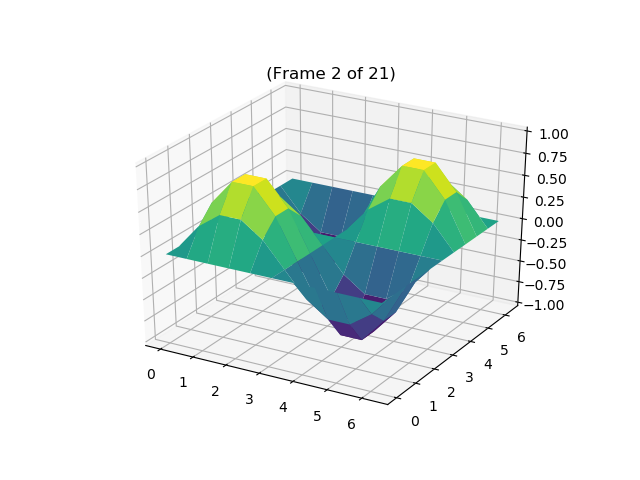

In [679]:
%matplotlib notebook

# Define a time-dependent function
def u_ex(x, y, t):
    return np.exp(-2*t)*np.sin(x)*np.sin(y)

t, T = 0, 1
#tau = 0.01
tau = 1.0/20
# Generate grid
L = 2*np.pi
n = 10
xi = np.linspace(0,L,n+1)
yi = np.linspace(0,L,n+1)
X,Y = np.meshgrid(xi,yi,sparse=True)

# Store U in a list for animation plot
U_list = [ u_ex(X, Y, 0)]

# Evaluate exact solution at each time step and store it
while t < T:
    t+= tau
    U = u_ex(X, Y, t)
    U_list.append(U)
    
# Set lower and upper z axis limit to avoid rescaling during simulation
zlim=(-1.0,1.0)
# Create animation
ani = plot_2D_animation(X, Y, U_list, title='', duration=10, zlim=zlim)

In [680]:
# copied from part1b, were not able to import it directly, yet
# Define index mapping
I = lambda i,j,n: i+j*(n+1)
def apply_bcs(F, G, n, I):
    # Add boundary values related to unknowns from the first and last grid ROW
    bc_indices = [ I(i,j,n)  for j in [0, n] for i in range(0, n+1) ]
    F[bc_indices] = G[bc_indices]
    
    # Add boundary values related to unknowns from the first and last grid COLUMN
    bc_indices = [ I(i,j,n)  for i in [0, n] for j in range(0, n+1) ]
    F[bc_indices] = G[bc_indices]
    

In [681]:
# copied from part1b, were not able to import it directly, yet
# added the option to not include bc, as specified in the text this should not be done in A when solving equation (4)
# space_start and space_end must also be given to ensure the right h
def fdm_poisson_2d_matrix_dense(n, incorporate_bc=True, space_start=None, space_end=None):
    # Redefine
    I = lambda i,j : i+j*(n+1)
    if space_start is not None and space_end is not None:
        h = (space_end - space_start)*1.0/n
    else:
        h = 1.0/n # Gridsize
    N = (n+1)**2 # Total number of unknowns
    A = np.zeros((N,N)) # Define zero matrix A of right size
    hh = h*h 
    
    # Define FD entries of A    
    for i in range(1, n):
        for j in range(1, n):
            k = I(i,j)
            A[k,I(i,j)] = 4/hh # U_ij
            A[k,I(i-1,j)] = -1/hh  # U_{i-1,j}
            A[k,I(i+1,j)] = -1/hh  # U_{i+1,j}
            A[k,I(i,j-1)] = -1/hh  # U_{i,j-1}
            A[k,I(i,j+1)] = -1/hh  # U_{i,j+1}
            
    # Incorporate boundary conditions
    if incorporate_bc:
        # Add boundary values related to unknowns from the first and last grid ROW
        for j in [0,n]:
            for i in range(0,n+1):
                A[I(i,j),I(i,j)] = 1

        # Add boundary values related to unknowns from the first and last grid COLUMN
        for i in [0,n]:
            for j in range(1,n):
                A[I(i,j),I(i,j)] = 1
            
    return A

In [682]:
def heat_solver(theta, f, u_0, g_d, u_exact, space_start, space_end, t_start, t_end, n, manual_tau=None):

    x,y = np.ogrid[space_start:space_end:(n+1)*1j, space_start:space_end:(n+1)*1j]
    h = (space_end - space_start)*1.0/n
    # manual_tau set to offset the stability issues if theta=0
    if manual_tau:
        tau = manual_tau
    else:
        tau = h/space_end
    
    # "loose" bound for number of time iterations, most often +1 is sufficient, but sometimes +2 is needed to 
    # not go out of bounds of the matrices when evaluating t_n
    k = int((t_end - t_start)/tau) + 2
    
    U = np.zeros((k, (n+1)**2))
    U_ex = np.zeros((k, (n+1)**2))
    err = np.zeros((k, (n+1)**2))
    
    # define U_0
    U[0][:] = u_0(x,y).ravel()
    U_ex[0][:] = u_exact(x,y,0).ravel()
    A = fdm_poisson_2d_matrix_dense(n, incorporate_bc=False, space_start=space_start, space_end=space_end)
    
    # Z is the matrix (Id -tau*theta*A)
    Z = (identity((n+1)**2, dtype='float') + tau*theta*dok_matrix(A)).tocsc()
    # Store the LU factorizarion of Z
    solve = factorized(Z)
    
    # Z is the matrix (Id -tau*(1-theta)*A)
    Z_bar = np.identity((n+1)**2) - tau*(1-theta)*A
    
    k = 1
    t = t_start
    while t < t_end:
        t += tau
        # Calculate F^{k+1} and F^{k}
        f_kp1 = f(x, y, t).ravel()
        f_k = f(x, y, (t-tau)).ravel()
        
        # calculate b^{k+1}
        b = Z_bar@U[k-1][:] + tau*theta*f_kp1 + tau*(1-theta)*f_k
        
        # incorporate bc
        g = g_d(x, y, t).ravel()
        apply_bcs(b, g, n, I)
        U[k][:] = solve(b)
        
        # calculate exact solution and error
        U_ex[k][:] = u_exact(x, y, t).ravel()
        err[k][:] = U[k][:] - U_ex[k][:]
        
        k += 1
    # remove last row of the matrices in case the where the results for t_n are at row k-1 and row k are only zeros,
    # this is to ensure that we don't get err=0 at the last row, since we have not evaluated the error at the last row
    if k == U.shape[0] - 1:
        U = np.delete(U, k, 0)
        U_ex = np.delete(U_ex, k, 0)
        err = np.delete(err, k, 0)
        
    return U, U_ex, err

In [683]:
# let k = 1, l = 1
xy_0 = 0.0
xy_n = 2*np.pi
t_0 = 0.0
t_n = 1.0
u_exact = lambda x, y, t: np.sin(x)*np.sin(y)*np.exp(-2*t)
u_0 = lambda x, y: np.sin(x)*np.sin(y)
f = lambda x, y, t :x*y*t*0
thetas = [0.0, 0.5, 1.0]
grids = [10, 20, 40, 80]

In [684]:
def heat_animation(n, theta, result, error_plot=False, exact_plot=False, a=None):
    # Generate grid
    L = 2*np.pi
    xi = np.linspace(0,L,n+1)
    yi = np.linspace(0,L,n+1)
    X,Y = np.meshgrid(xi,yi,sparse=True)

    result_list = []
    # transform the format of the result/exact solution/error to be plotted by the animation
    for i in range(result.shape[0]):
        result_list.append(np.reshape(result[i][:], ((n+1),(n+1))))

    # Set lower and upper z axis limit to avoid rescaling during simulation
    zlim = (-1.0, 1.0)
    max_val = np.amax(result)
    if max_val < 1:
        zlim=(-max_val*1.1, max_val*1.1)
    # set titles according to what is beeing animated
    ttitle = 'U, '
    a_title = ''
    if a:
        a_title = 'alpha = {:.2f}, '.format(a)
    if exact_plot:
        ttitle = 'Exact solution, '
    elif error_plot:
        ttitle = 'Error plot, '
        
    # Create animation
    ani = plot_2D_animation(X, Y, result_list, title='{}{}theta={:.2f}, n = {:d}'.format(ttitle, a_title, theta, n), 
                            duration=10, zlim=zlim)
    return ani

In [685]:
# would result in 12 animations, and a total of 36 if animating, U, U_ex and the error
if False:
    anim_list = []
    for theta in thetas:
        for n in grids:
            result, u_ex, err = heat_solver(theta, f, u_0, u_exact, u_exact, xy_0, xy_n, t_0, t_n, n)
            anim_list.append(heat_animation(n, theta, result))
            # animate exact solution and error also
            if False:
                anim_list.append(heat_animation(n, theta, u_ex, exact_plot=True))
                anim_list.append(heat_animation(n, theta, err, error_plot=True))


In [688]:
# play around with different theta and n. To observe the wild behaviour of the solution for theta = 0.0
# specify standard_zlim=True in the call to heat_animation()
theta = 0.5
n = 40
result, u_ex, err = heat_solver(theta, f, u_0, u_exact, u_exact, xy_0, xy_n, t_0, t_n, n)

<IPython.core.display.Javascript object>


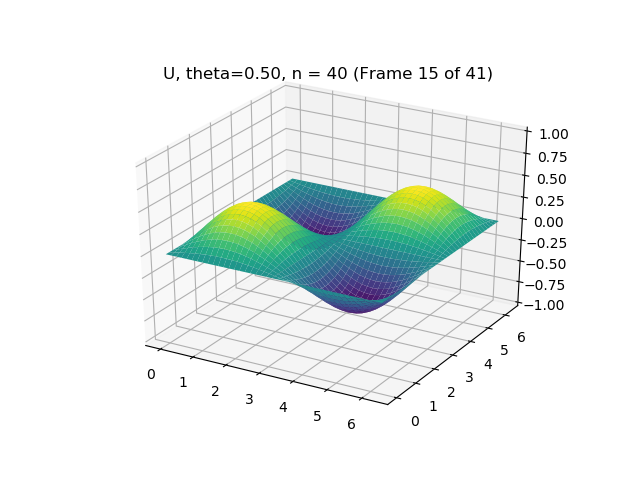

<IPython.core.display.Javascript object>


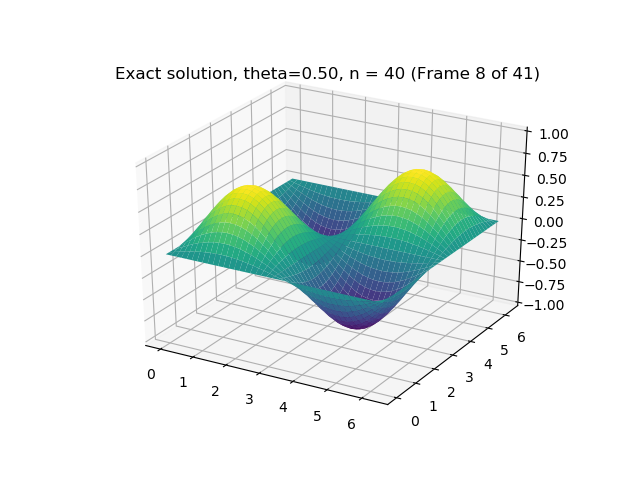

<IPython.core.display.Javascript object>


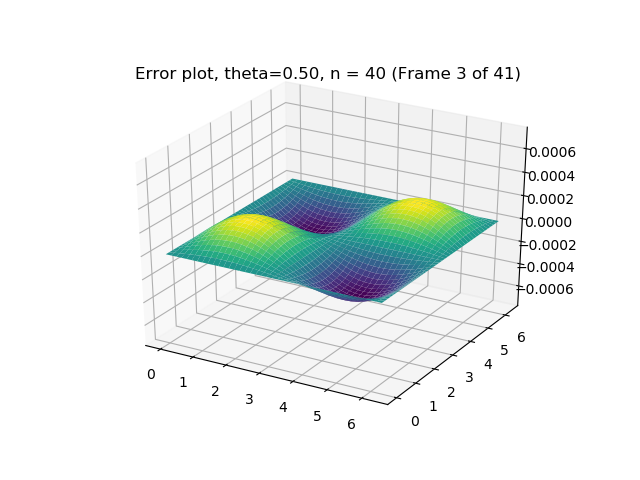

In [689]:
# Create animation of the approximated solution, the exact solution and the error for the computation done in the 
# cell above
anims = []
anims.append(heat_animation(n, theta, result))
anims.append(heat_animation(n, theta, u_ex, exact_plot=True))
anims.append(heat_animation(n, theta, err, error_plot=True))

Computing the error $\text{err}(\text{n})$

In [690]:
err_n = np.zeros((len(thetas)*2, len(grids)))
i = 0
for theta in thetas:
    j = 0
    for n in grids:
        result, u_ex, err = heat_solver(theta, f, u_0, u_exact, u_exact, xy_0, xy_n, t_0, t_n, n)
        err_n[i][j] = np.amax(err)
        if j > 0:
            # compute EOC(n)
            err_n[i+1][j] = ((np.log10(err_n[i][j]) - np.log10(err_n[i][j-1]))/
                            (np.log10(grids[j-1]) - np.log10(grids[j])))
        j += 1
    i += 2


In [691]:
import pandas as pd
text_arr = np.array([r'err(n), $\theta=0.0$', 'EOC(n)', r'err(n), $\theta=0.5$',
                     'EOC(n)', r'err(n), $\theta=1.0$', 'EOC(n)'])
err_new = np.column_stack((text_arr, err_n))
errn_df = pd.DataFrame(err_new, columns=['',r'$n=10$', r'$n=20$', r'$n=40$', r'$n=80$'])
errn_df

,,$n=10$,$n=20$,$n=40$,$n=80$
0,"err(n), $\theta=0.0$",0.024134602321813636,0.016012010355577977,7.331878998970787e+16,7.10515806448692e+78
1,EOC(n),0.0,0.5919486010699796,-61.989734230769976,-205.91422565099143
2,"err(n), $\theta=0.5$",0.009939267193133261,0.0027262722580310705,0.0006802294361002992,0.00016997316815192676
3,EOC(n),0.0,1.8662098445541502,2.0028363000904488,2.0007144167829254
4,"err(n), $\theta=1.0$",0.0407486911845798,0.020548890111207252,0.00974823867475294,0.004737967675339794
5,EOC(n),0.0,0.9876932488587733,1.0758469936309434,1.0408732184102563


We observe an experimental rate of convergence of 1 for the backward Euler, and 2 for the trapezoidal formula, consistent with the orders found earlier. The solution by forward Euler blows up, as the time step restriction is not met for all $n$. 

#### Task 5

Finally,  we have a closer look at the so-called CFL (Courant-Friedrichs-Lewy) condition stating that in two space dimensions,
the explicit Euler scheme given by $\theta = 0$ needs to satisfy the __time-step restriction__
$$
\tau \leqslant h^2/4
$$
to render the full discretization scheme stable. In the Wednesday lecture given by Anne Kværno, you will see/have
already seen how this is related to __stiff system__ and the concept of __$A$-stability__
and the __stability function__.

Now define $\tau$ as follows
$$
\tau = \alpha h^2/4
$$
with  a safety factor $\alpha$ and $h = 2\pi/n$ for some $n\in \NN$.

Choose $t_0 = 0$, $T=1$, $f = g_D = 0$ and
use as initial data the step function
\begin{align*}
u_0(x,y) = 
\begin{cases}
1 \quad \text{if } |x -  \pi| < \pi/3  \wedge |y -  \pi| < \pi/3
\\
0 \quad \text{else.}
\end{cases}
\end{align*}

__a__)
Now solve the heat equation using the explicit Euler for $n = 20$ and corresponding 
time-step $\tau$ for $\alpha = 0.9, 1, 1.1$. What do you observe?
__b__
Repeat the experiment setting the end time to $T = 20$ and
$\alpha = 0.99, 1, 1.01$.  Observation? (That should demonstrate the strictness of the CFL condition.)



### Code Snippet

For the step function you can integrate the following code snippet.

In [692]:
def u_0_step(x, y):
    step = 0*np.ones_like(x)*np.ones_like(y)

    def is_inside(x, y):
        eps = 1e-10
        return  np.abs(x - np.pi) < np.pi/3  and np.abs(y - np.pi) < np.pi/3

    for i in range(x.shape[0]):
        for j in range(y.shape[1]):
            if is_inside(x[i,0], y[0,j]):
                step[i,j] = 1
    return step

In [699]:
alphas = [0.9, 1.0, 1.1, 0.99, 1.0, 1.01]
f = lambda x, y, t: 0*x*y*t
g_d = lambda x, y,t: 0*x*y*t
tau = lambda h, alpha: (alpha*h**2)/4
t_0 = 0.0
t_n = 1.0
xy_0 = 0.0
xy_n = 2*np.pi
n = 20
theta  = 0.0

<IPython.core.display.Javascript object>


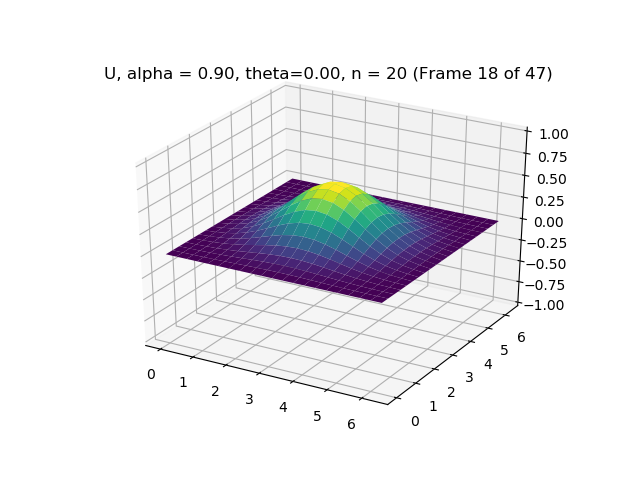

<IPython.core.display.Javascript object>


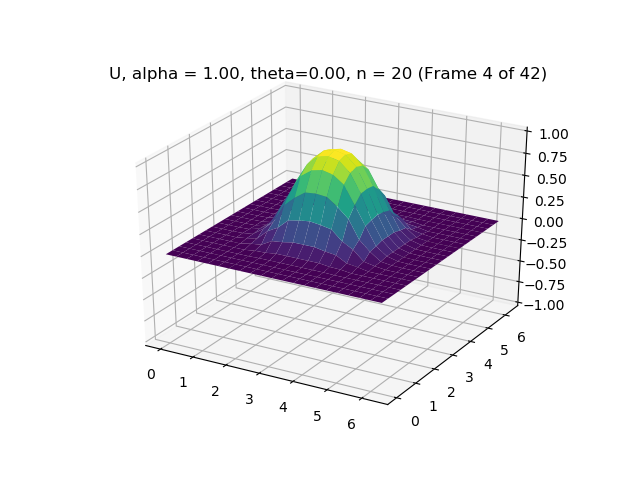

<IPython.core.display.Javascript object>


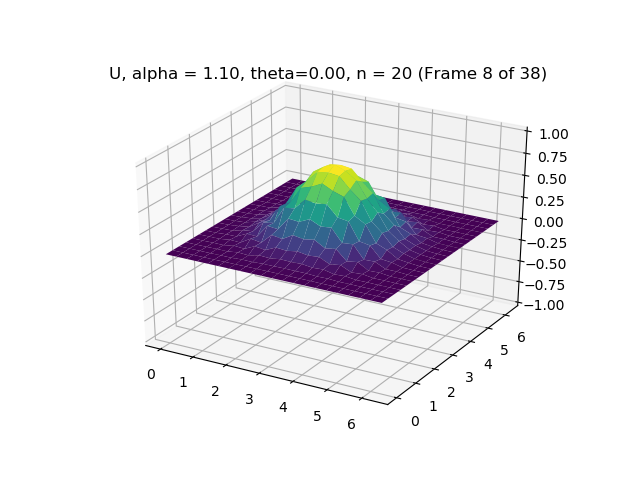

In [700]:
anims = []
for alpha in alphas[:3]:
    ttau = tau(xy_n/n, alpha)
    result, u_ex, err = heat_solver(theta, f, u_0_step, g_d, u_exact, xy_0, xy_n, t_0, t_n, n, manual_tau=ttau)
    anims.append(heat_animation(n, theta, result, a=alpha))

<IPython.core.display.Javascript object>


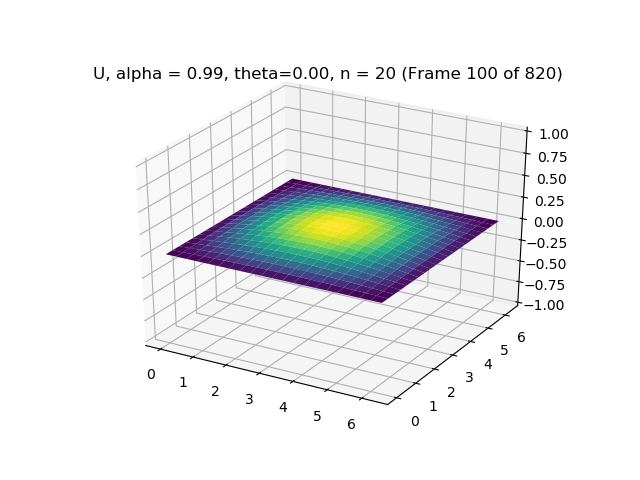

<IPython.core.display.Javascript object>


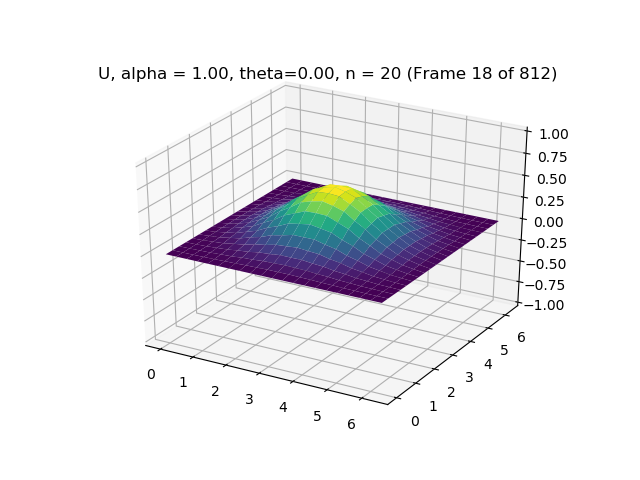

<IPython.core.display.Javascript object>


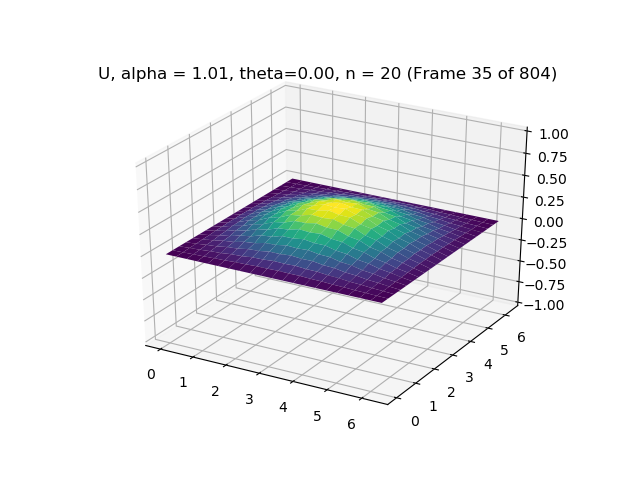

In [702]:
t_n = 20
anims = []
for alpha in alphas[3:]:
    ttau = tau(xy_n/n, alpha)
    result, u_ex, err = heat_solver(theta, f, u_0_step, g_d, u_exact, xy_0, xy_n, t_0, t_n, n, manual_tau=ttau)
    anims.append(heat_animation(n, theta, result, a=alpha,))